# NOAA Data wrangling<a id='NOAA_Data_wrangling'></a>

## 1.1 Contents<a id='1.1_Contents'></a> 


* [1 Data wrangling](#1_Data_wrangling)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Introduction](#1.2_Introduction)
    * [1.2.1 Recap Of Data Science Problem](#1.2.1_Recap_Of_Data_Science_Problem)
    * [1.2.2 Data Wrangling Steps](#1.2.2_Data_Wrangling_Steps)
  * [1.3 Imports](#1.3_Imports)
  * [1.4 Objectives](#1.4_Objectives)
  * [1.5 Load Applicable Data](#1.5_Load_Applicable_Data)
  * [1.6 Data Definition](#1.6_Data_Definition)
 

## 1.2 Introduction<a id='1.2_Introduction'></a>

This step focuses on collecting your data, organizing it, and making sure it's well defined. Paying attention to these tasks will pay off greatly later on. Some data cleaning can be done at this stage, but it's important not to be overzealous in your cleaning before you've explored the data to better understand it.

### 1.2.1 Recap Of Data Science Problem<a id='1.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to use machine learning to classify false solar detection as the National Oceanic and Atmospheric Administration (NOAA) is keen to differentiate actual lightening flashes from sun reflections

### 1.2.2 Data Wrangling Steps <a id='1.2.2_Data_Wrangling_Steps'></a>

* Data Collection: 
    * including data loading, joining, etc

* Data Organization: GitHub file structure (see cookie cutter data science template)

* Data Definition: gain understanding of data features

* Data Cleaning: NA or missing values, duplicates

## 1.3 Imports<a id='1.3_Imports'></a>

In [13]:

#Import applicable libraries and modules.  
# Note from base anaconda environment: needed to install cartopy, metpy and netcdf4 packages
import os 
import pandas as pd
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# from library.sb_utils import save_file 
# import netcdf4 as nc
# ModuleNotFoundError: No module named 'netcdf4'



## 1.4 Objectives<a id='1.4_Objectives'></a>

**Figure out how to work with NC file types:**

    * Standard format for binary geoscience data
    * There is a NetCDF4 library available that reads NetCDF files into numpy arrays
    * Have to install the netcdf binary applications to get it to work. Those are very useful - especially ncdump for seeing what’s in a file 
    
Tutorial for netcdf data, reading netcdf portion is directly applicable: https://unidata.github.io/python-gallery/examples/mapping_GOES16_TrueColor.html     
 


## 1.5 Load Applicable Data<a id='1.5_Load_Applicable_Data'></a>

In [14]:
# Loading Geostationary Lightning Mapper (GLM) data files:
# Open the 3 types of files with xarray.
# The opened files are assigned to "L" for lightning, "G" for glint and "B" for both

# Lightning
FILEL = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_lightning_db_final.nc')
L = xr.open_dataset(FILEL)

# Glint
FILEG = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_glint_db_final.nc')
G = xr.open_dataset(FILEG)
# Day Glint
FILEGD = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_dayglint_db_final.nc')
GD = xr.open_dataset(FILEGD)
# Night Glint
FILEGN = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_nightglint_db_final.nc')
GN = xr.open_dataset(FILEGN)

#Both on 3 separate days
FILEB20180901 = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_both_20180901.nc')
B20180901 = xr.open_dataset(FILEB20180901)

FILEB20180930 = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_both_20180930.nc')
B20180930 = xr.open_dataset(FILEB20180930)

FILEB20181020 = ('../GLM_Solar_Data_LA-UR_19-26659/rawdata/glm_both_20181020.nc')
B20181020 = xr.open_dataset(FILEB20181020)


Geostationary Lightning Mapper (GLM)  is organized into 3 types of files:
* glm_lightning_db_final.nc -> list of natural lightning cases. Days are chosen where solar contamination is not observed, so should be free of solar artifacts
* glm_glint_db_final.nc -> list of confirmed solar contamination cases. Identified by continuous illumination in a single pixel. This filter is very good at detecting all types of glint, but has an unreasonably-high missed event rate
    * NOTE: Files for daytime glint only and nighttime glint only also exist.
* glm_both_20180901.nc -> a random sample of GLM data that contains both lightning and glint cases. Can be used for testing an independent sample of data
    * NOTE: 2 other days – 9/30/2018 and 10/20/2018 – also exist.

Good first steps in auditing the data are the info method and displaying the first few records with head.


In [15]:
#Exploring Data with Info Method#
#Call the info method on L to see a summary of the data

# L.info()

# G.info()
# GD.info()
# GN.info()

# B20180901.info()
# B20180930.info()
B20180930.info()


xarray.Dataset {
dimensions:
	FLASH_1SIG_GROUP_COUNT_x = 29999999 ;
	FLASH_1SIG_SERIES_COUNT_x = 29999999 ;
	FLASH_2SIG_GROUP_COUNT_x = 29999999 ;
	FLASH_2SIG_SERIES_COUNT_x = 29999999 ;
	FLASH_3SIG_GROUP_COUNT_x = 29999999 ;
	FLASH_3SIG_SERIES_COUNT_x = 29999999 ;
	FLASH_AREA_x = 29999999 ;
	FLASH_DURATION_x = 29999999 ;
	FLASH_ENERGY_x = 29999999 ;
	FLASH_EVENT_COUNT_x = 29999999 ;
	FLASH_EVENT_MAX_ENERGY_x = 29999999 ;
	FLASH_EVENT_MAX_SEPARATION_x = 29999999 ;
	FLASH_EVENT_MIN_ENERGY_x = 29999999 ;
	FLASH_GROUP_COUNT_x = 29999999 ;
	FLASH_GROUP_MAX_ENERGY_x = 29999999 ;
	FLASH_GROUP_MAX_SEPARATION_x = 29999999 ;
	FLASH_GROUP_MEAN_ENERGY_x = 29999999 ;
	FLASH_GROUP_MIN_ENERGY_x = 29999999 ;
	FLASH_GROUP_TOTAL_SEPARATION_x = 29999999 ;
	FLASH_ID_x = 29999999 ;
	FLASH_LAT_x = 29999999 ;
	FLASH_LCFA_CDATE_x = 29999999 ;
	FLASH_LCFA_TSTAMP_x = 29999999 ;
	FLASH_LON_x = 29999999 ;
	FLASH_SERIES_COUNT_x = 29999999 ;
	FLASH_TIME_OFFSET_OF_FIRST_EVENT_x = 29999999 ;
	FLASH_TIME_OFFSET_OF_LA

Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 

In Python, NumPy provides the fundamental data structure and API for working with raw ND arrays. However, real-world datasets are usually more than just raw numbers; they have labels which encode information about how the array values map to locations in space, time, etc. 

Xarray doesn’t just keep track of labels on arrays – it uses them to provide a powerful and concise interface.

From: [Why xarray]( http://xarray.pydata.org/en/stable/why-xarray.html)  

In [16]:
#Exploring Data with Head Method#
#Call the head method on L to print the first several rows of the data
L.head()

<xarray.Dataset>
Dimensions:                           (FLASH_1SIG_GROUP_COUNT_x: 5, FLASH_1SIG_SERIES_COUNT_x: 5, FLASH_2SIG_GROUP_COUNT_x: 5, FLASH_2SIG_SERIES_COUNT_x: 5, FLASH_3SIG_GROUP_COUNT_x: 5, FLASH_3SIG_SERIES_COUNT_x: 5, FLASH_AREA_x: 5, FLASH_DURATION_x: 5, FLASH_ENERGY_x: 5, FLASH_EVENT_COUNT_x: 5, FLASH_EVENT_MAX_ENERGY_x: 5, FLASH_EVENT_MAX_SEPARATION_x: 5, FLASH_EVENT_MIN_ENERGY_x: 5, FLASH_GROUP_COUNT_x: 5, FLASH_GROUP_MAX_ENERGY_x: 5, FLASH_GROUP_MAX_SEPARATION_x: 5, FLASH_GROUP_MEAN_ENERGY_x: 5, FLASH_GROUP_MIN_ENERGY_x: 5, FLASH_GROUP_TOTAL_SEPARATION_x: 5, FLASH_ID_x: 5, FLASH_LAT_x: 5, FLASH_LCFA_CDATE_x: 5, FLASH_LCFA_TSTAMP_x: 5, FLASH_LON_x: 5, FLASH_SERIES_COUNT_x: 5, FLASH_TIME_OFFSET_OF_FIRST_EVENT_x: 5, FLASH_TIME_OFFSET_OF_LAST_EVENT_x: 5)
Dimensions without coordinates: FLASH_1SIG_GROUP_COUNT_x, FLASH_1SIG_SERIES_COUNT_x, FLASH_2SIG_GROUP_COUNT_x, FLASH_2SIG_SERIES_COUNT_x, FLASH_3SIG_GROUP_COUNT_x, FLASH_3SIG_SERIES_COUNT_x, FLASH_AREA_x, FLASH_DURATION_x, FLASH_ENERGY_x, FLASH_EVENT_COUNT_x, FLASH_EVENT_MAX_ENERGY_x, FLASH_EVENT_MAX_SEPARATION_x, FLASH_EVENT_MIN_ENERGY_x, FLASH_GROUP_COUNT_x, FLASH_GROUP_MAX_ENERGY_x, FLASH_GROUP_MAX_SEPARATION_x, FLASH_GROUP_MEAN_ENERGY_x, FLASH_GROUP_MIN_ENERGY_x, FLASH_GROUP_TOTAL_SEPARATION_x, FLASH_ID_x, FLASH_LAT_x, FLASH_LCFA_CDATE_x, FLASH_LCFA_TSTAMP_x, FLASH_LON_x, FLASH_SERIES_COUNT_x, FLASH_TIME_OFFSET_OF_FIRST_EVENT_x, FLASH_TIME_OFFSET_OF_LAST_EVENT_x
Data variables:
    FLASH_ID                          (FLASH_ID_x) int32 ...
    FLASH_LCFA_CDATE                  (FLASH_LCFA_CDATE_x) int32 ...
    FLASH_LCFA_TSTAMP                 (FLASH_LCFA_TSTAMP_x) int32 ...
    FLASH_TIME_OFFSET_OF_FIRST_EVENT  (FLASH_TIME_OFFSET_OF_FIRST_EVENT_x) float32 ...
    FLASH_TIME_OFFSET_OF_LAST_EVENT   (FLASH_TIME_OFFSET_OF_LAST_EVENT_x) float32 ...
    FLASH_LAT                         (FLASH_LAT_x) float32 ...
    FLASH_LON                         (FLASH_LON_x) float32 ...
    FLASH_AREA                        (FLASH_AREA_x) float32 ...
    FLASH_ENERGY                      (FLASH_ENERGY_x) float32 ...
    FLASH_GROUP_COUNT                 (FLASH_GROUP_COUNT_x) int32 ...
    FLASH_SERIES_COUNT                (FLASH_SERIES_COUNT_x) int32 ...
    FLASH_EVENT_COUNT                 (FLASH_EVENT_COUNT_x) int32 ...
    FLASH_DURATION                    (FLASH_DURATION_x) float32 ...
    FLASH_GROUP_MAX_SEPARATION        (FLASH_GROUP_MAX_SEPARATION_x) float32 ...
    FLASH_GROUP_TOTAL_SEPARATION      (FLASH_GROUP_TOTAL_SEPARATION_x) float32 ...
    FLASH_EVENT_MAX_SEPARATION        (FLASH_EVENT_MAX_SEPARATION_x) float32 ...
    FLASH_1SIG_GROUP_COUNT            (FLASH_1SIG_GROUP_COUNT_x) int32 ...
    FLASH_2SIG_GROUP_COUNT            (FLASH_2SIG_GROUP_COUNT_x) int32 ...
    FLASH_3SIG_GROUP_COUNT            (FLASH_3SIG_GROUP_COUNT_x) int32 ...
    FLASH_1SIG_SERIES_COUNT           (FLASH_1SIG_SERIES_COUNT_x) int32 ...
    FLASH_2SIG_SERIES_COUNT           (FLASH_2SIG_SERIES_COUNT_x) int32 ...
    FLASH_3SIG_SERIES_COUNT           (FLASH_3SIG_SERIES_COUNT_x) int32 ...
    FLASH_EVENT_MAX_ENERGY            (FLASH_EVENT_MAX_ENERGY_x) float32 ...
    FLASH_EVENT_MIN_ENERGY            (FLASH_EVENT_MIN_ENERGY_x) float32 ...
    FLASH_GROUP_MAX_ENERGY            (FLASH_GROUP_MAX_ENERGY_x) float32 ...
    FLASH_GROUP_MEAN_ENERGY           (FLASH_GROUP_MEAN_ENERGY_x) float32 ...
    FLASH_GROUP_MIN_ENERGY            (FLASH_GROUP_MIN_ENERGY_x) float32 ...

## 1.6 Data Definition <a id='1.6_Data_Definition'></a>

### 1.6.1 Understanding Flash Parameters <a id='1.6.1_Understanding_Flash_Parameters'></a>

Contents of glm_lightning_db_final.nc

FLASH_ID	:	Unique	identifier	of	lightning	flash									
FLASH_LCFA_CDATE	:	GLM	data	packet	date	stamp	YYYYDOY	(DOY	is	day	of	year)			
FLASH_LCFA_TSTAMP	:	GLM	data	packet	time	stamp	in	UTC	HHMMSS						
FLASH_TIME_OFFSET_OF_FIRST_EVENT	:	Starting	time	of	flash	in	seconds	after	LCFA_TSTAMP						
FLASH_TIME_OFFSET_OF_LAST_EVENT	:	Ending	time	of	flash	in	seconds	after	LCFA_TSTAMP						
FLASH_LAT	:	Flash	latitude												
FLASH_LON	:	Flash	longitude												
FLASH_AREA	:	Flash	illuminated	area	in	m^2									
FLASH_ENERGY	:	Flash	total	optical	energy	in	J								
FLASH_GROUP_COUNT	:	Number	of	optical	pulses	(termed	“groups”)	in	the	lash					
FLASH_SERIES_COUNT	:	Number	of	distinct	periods	of	illumination	(termed	“series”)	in	the	flash			
FLASH_EVENT_COUNT	:	Number	of	unique	instrument	illuminated	piels	(termed	“events”)	in	the	flash			
FLASH_DURATION	:	Flash	duration	in	seconds										
FLASH_GROUP_MAX_SEPARATION	:	Maximum	separation	of	groups	in	the	flash	in	km					
FLASH_GROUP_TOTAL_SEPARATION	:	Total	separation	of	all	line	segments	connecting	groups	in	the	flash	in	km	
FLASH_EVENT_MAX_SEPARATION	:	Maximum	separation	of	events	in	the	flash	in	km					
FLASH_1SIG_GROUP_COUNT	:	Number	of	bright	groups	in	the	flash	at	the	mean+1*sigma	(standard	deviation)	energy	level
FLASH_2SIG_GROUP_COUNT	:	Number	of	bright	groups	in	the	flash	at	the	2-sigma	energy	level		
FLASH_3SIG_GROUP_COUNT	:	Number	of	bright	groups	in	the	flash	at	the	3-sigma	energy	level		
FLASH_1SIG_SERIES_COUNT	:	Number	of	series	in	the	flash	with	1-sigma	bright	groups				
FLASH_2SIG_SERIES_COUNT	:	Number	of	series	in	the	flash	with	2-sigma	bright	groups				
FLASH_3SIG_SERIES_COUNT	:	Number	of	series	in	the	flash	with	3-sigma	bright	groups				
FLASH_EVENT_MAX_ENERGY	:	Optical	energy	of	brightest	event	(illuminated	pixel)	in	the	flash	in	J		
FLASH_EVENT_MIN_ENERGY	:	Optical	energy	of	dimmest	event	(illuminated	pixel)	in	the	flash	in	J		
FLASH_GROUP_MAX_ENERGY	:	Optical	energy	of	brightest	group	(i.e.,	pulse)	in	the	flash	in	J		
FLASH_GROUP_MEAN_ENERGY	:	Mean	optical	energy	of	all	groups	in	the	flash	in	J			
FLASH_GROUP_MIN_ENERGY	:	Optical	energy	of	dimmest	group	in	the	flash	in	J				
																											

Contents of glm_dayglint_db_final.nc

**NOTE: the energy / area parameters have different units in this file compared to the other two. Be careful!**

FLASH_ID	:	Unique identifier of lightning flash			
FLASH_LCFA_CDATE	:	GLM data packet date stamp YYYYDOY (DOY is day of year)			
FLASH_LCFA_TSTAMP	:	GLM data packet time stamp in UTC HHMMSS			
FLASH_TIME_OFFSET_OF_FIRST_EVENT	:	Starting time of flash in seconds after LCFA_TSTAMP			
FLASH_TIME_OFFSET_OF_LAST_EVENT	:	Ending time of flash in seconds after LCFA_TSTAMP			
FLASH_LAT	:	Flash latitude			
FLASH_LON	:	Flash longitude			
FLASH_AREA	:	Flash illuminated area in km^2			
FLASH_ENERGY	:	Flash total optical energy in fJ			
FLASH_GROUP_COUNT	:	Number of optical pulses (termed “groups”) in the lash			
FLASH_SERIES_COUNT	:	Number of distinct periods of illumination (termed “series”) in the flash			
FLASH_EVENT_COUNT	:	Number of unique instrument illuminated piels (termed “events”) in the flash			
FLASH_DURATION	:	Flash duration in seconds			
FLASH_GROUP_MAX_SEPARATION	:	Maximum separation of groups in the flash in km			
FLASH_GROUP_TOTAL_SEPARATION	:	Total separation of all line segments connecting groups in the flash in km			
FLASH_EVENT_MAX_SEPARATION	:	Maximum separation of events in the flash in km			
FLASH_1SIG_GROUP_COUNT	:	Number of bright groups in the flash at the mean+1*sigma (standard deviation) energy level			
FLASH_2SIG_GROUP_COUNT	:	Number of bright groups in the flash at the 2-sigma energy level			
FLASH_3SIG_GROUP_COUNT	:	Number of bright groups in the flash at the 3-sigma energy level			
FLASH_1SIG_SERIES_COUNT	:	Number of series in the flash with 1-sigma bright groups			
FLASH_2SIG_SERIES_COUNT	:	Number of series in the flash with 2-sigma bright groups			
FLASH_3SIG_SERIES_COUNT	:	Number of series in the flash with 3-sigma bright groups			
FLASH_EVENT_MAX_ENERGY	:	Optical energy of brightest event (illuminated pixel) in the flash in fJ			
FLASH_EVENT_MIN_ENERGY	:	Optical energy of dimmest event (illuminated pixel) in the flash in fJ			
FLASH_GROUP_MAX_ENERGY	:	Optical energy of brightest group (i.e., pulse) in the flash in fJ			
FLASH_GROUP_MEAN_ENERGY	:	Mean optical energy of all groups in the flash in fJ			
FLASH_GROUP_MIN_ENERGY	:	Optical energy of dimmest group in the flash in fJ			


Contents of glm_both_20180901.nc

FLASH_ID	:	Unique identifier of lightning flash				
FLASH_LCFA_CDATE	:	GLM data packet date stamp YYYYDOY (DOY is day of year)				
FLASH_LCFA_TSTAMP	:	GLM data packet time stamp in UTC HHMMSS				
FLASH_TIME_OFFSET_OF_FIRST_EVENT	:	Starting time of flash in seconds after LCFA_TSTAMP				
FLASH_TIME_OFFSET_OF_LAST_EVENT	:	Ending time of flash in seconds after LCFA_TSTAMP				
FLASH_LAT	:	Flash latitude				
FLASH_LON	:	Flash longitude				
FLASH_AREA	:	Flash illuminated area in m^2				
FLASH_ENERGY	:	Flash total optical energy in J				
FLASH_GROUP_COUNT	:	Number of optical pulses (termed “groups”) in the lash				
FLASH_SERIES_COUNT	:	Number of distinct periods of illumination (termed “series”) in the flash				
FLASH_EVENT_COUNT	:	Number of unique instrument illuminated piels (termed “events”) in the flash				
FLASH_DURATION	:	Flash duration in seconds				
FLASH_GROUP_MAX_SEPARATION	:	Maximum separation of groups in the flash in km				
FLASH_GROUP_TOTAL_SEPARATION	:	Total separation of all line segments connecting groups in the flash in km				
FLASH_EVENT_MAX_SEPARATION	:	Maximum separation of events in the flash in km				
FLASH_1SIG_GROUP_COUNT	:	Number of bright groups in the flash at the mean+1*sigma (standard deviation) energy level				
FLASH_2SIG_GROUP_COUNT	:	Number of bright groups in the flash at the 2-sigma energy level				
FLASH_3SIG_GROUP_COUNT	:	Number of bright groups in the flash at the 3-sigma energy level				
FLASH_1SIG_SERIES_COUNT	:	Number of series in the flash with 1-sigma bright groups				
FLASH_2SIG_SERIES_COUNT	:	Number of series in the flash with 2-sigma bright groups				
FLASH_3SIG_SERIES_COUNT	:	Number of series in the flash with 3-sigma bright groups				
FLASH_EVENT_MAX_ENERGY	:	Optical energy of brightest event (illuminated pixel) in the flash in J				
FLASH_EVENT_MIN_ENERGY	:	Optical energy of dimmest event (illuminated pixel) in the flash in J				
FLASH_GROUP_MAX_ENERGY	:	Optical energy of brightest group (i.e., pulse) in the flash in J				
FLASH_GROUP_MEAN_ENERGY	:	Mean optical energy of all groups in the flash in J				
FLASH_GROUP_MIN_ENERGY	:	Optical energy of dimmest group in the flash in J				

In [17]:
#Getting feel for data
# about 29 mm records

# L.info()

# G.info()
# GD.info()
# GN.info()

# B20180901.info()
# B20180930.info()
# B20180930.info()

#test = L['FLASH_LAT'].data
#print(test)

#print(L)

#key properties for DataArray
#L.values
#L.dims
#L.attrs

#L['FLASH_LAT'].data.T

#print(len(L['FLASH_LAT']))
# 29,000,001

#print(len(L['FLASH_ID']))
# 29,000,001

print(len(L['FLASH_AREA']))
# 29000001

series= L['FLASH_LAT'].to_series()
print(series)



29000001
FLASH_LAT_x
0          -21.547247
1          -18.311792
2           15.747572
3          -24.390753
4           37.776203
              ...    
28999996    31.498873
28999997    25.598253
28999998    36.254230
28999999    16.217833
29000000    30.770313
Name: FLASH_LAT, Length: 29000001, dtype: float32


In [18]:
dftest = L['FLASH_LAT'].to_dataframe()
dftest


,FLASH_LAT
FLASH_LAT_x,
0,-21.547247
1,-18.311792
2,15.747572
3,-24.390753
4,37.776203
...,...
28999996,31.498873
28999997,25.598253
28999998,36.254230


In [19]:
L['FLASH_LAT']


<xarray.DataArray 'FLASH_LAT' (FLASH_LAT_x: 29000001)>
array([-21.547247, -18.311792,  15.747572, ...,  36.25423 ,  16.217833,
        30.770313], dtype=float32)
Dimensions without coordinates: FLASH_LAT_x

To Do: Summarize findings here

In [20]:
L.FLASH_LAT

<xarray.DataArray 'FLASH_LAT' (FLASH_LAT_x: 29000001)>
array([-21.547247, -18.311792,  15.747572, ...,  36.25423 ,  16.217833,
        30.770313], dtype=float32)
Dimensions without coordinates: FLASH_LAT_x

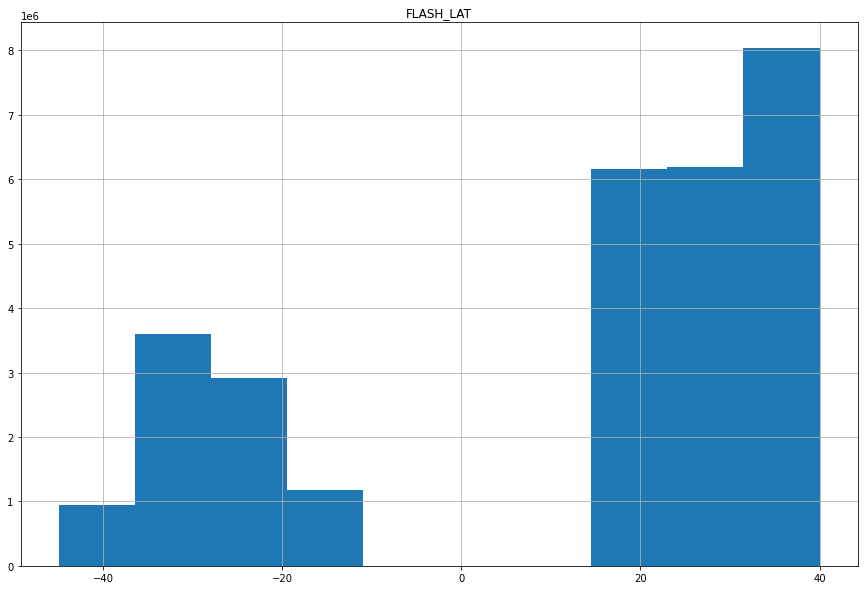

In [21]:
# Experimenting w matplotlib subplots
#Call `hist` method to plot histograms of each of the numeric features
#Try passing it an argument figsize=(15,10)
#Try calling plt.subplots_adjust() with an argument hspace=0.5 to adjust the spacing
#It's important you create legible and easy-to-read plots
dftest.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
#Hint: notice how the terminating ';' "swallows" some messy output and leads to a tidier notebook

In [22]:
dftest.describe()


,FLASH_LAT
count,2.900000e+07
mean,1.151924e+01
std,2.666893e+01
min,-4.500000e+01
25%,-2.030069e+01
50%,2.254980e+01
75%,3.224827e+01
max,4.000000e+01


In [23]:
#experimenting with Xarray plotting

#L.plt()

### 1.6.2 Generating Histograms For Each Applicable Field<a id='2.6.2_Generating_Histograms_For_Each_Applicable_Field'></a>

One way to double check that the data is reasonable is to use matplotlib to generate histograms for each field. They should all have normal or log normal behavior. If you see a huge peak at a large positive or negative value, then it’s a problem. If there are only a few events on the extreme tails, then you’re golden.

Notes: some fields that might not make sense for the histograms are FLASH_ID, FLASH_TIME_OFFSET_OF_FIRST_EVENT, and FLASH_TIME_OFFSET_OF_LAST_EVENT (as the offsets are rolling counters)

If want to use FLASH_LCFA_CDATE, need to strip off year first

(array([4886553., 2971964., 2368693., 2030529., 1516514., 1243778.,
        1318488., 2351715., 4386915., 5924852.]),
 array([     0.,  23450.,  46900.,  70350.,  93800., 117250., 140700.,
        164150., 187600., 211050., 234500.]),
 <BarContainer object of 10 artists>)

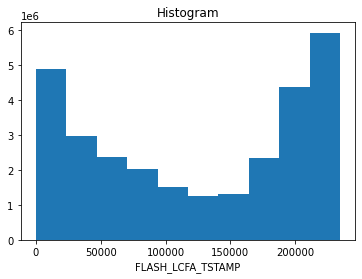

In [24]:
#Trying to plot historgrams for all Lightning data fields
L.FLASH_LCFA_TSTAMP.plot.hist()


(array([ 939688., 3591937., 2907785., 1178369.,       0.,       0.,
              0., 6153964., 6190950., 8037308.]),
 array([-44.999996, -36.499996, -27.999998, -19.499998, -10.999999,
         -2.5     ,   5.999999,  14.499998,  22.999998,  31.499996,
         39.999996], dtype=float32),
 <BarContainer object of 10 artists>)

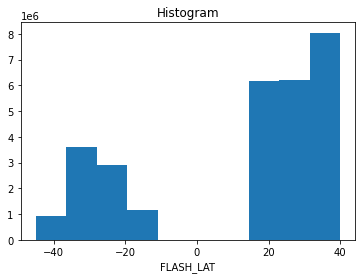

In [25]:
L.FLASH_LAT.plot.hist()

(array([1140557., 4924063., 4924199., 4436414., 3381510., 1497276.,
        2911360., 4238015.,  955894.,  590713.]),
 array([-109.99998 , -102.999985,  -95.999985,  -88.999985,  -81.99999 ,
         -75.      ,  -68.      ,  -61.000004,  -54.000008,  -47.00001 ,
         -40.000015], dtype=float32),
 <BarContainer object of 10 artists>)

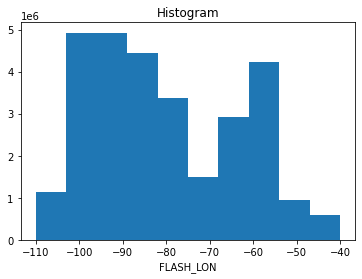

In [26]:
L.FLASH_LON.plot.hist()

(array([2.8990605e+07, 8.3570000e+03, 7.8500000e+02, 1.7400000e+02,
        4.9000000e+01, 1.6000000e+01, 7.0000000e+00, 4.0000000e+00,
        1.0000000e+00, 3.0000000e+00]),
 array([6.5160996e+07, 7.9745034e+09, 1.5883846e+10, 2.3793187e+10,
        3.1702530e+10, 3.9611871e+10, 4.7521214e+10, 5.5430558e+10,
        6.3339897e+10, 7.1249240e+10, 7.9158583e+10], dtype=float32),
 <BarContainer object of 10 artists>)

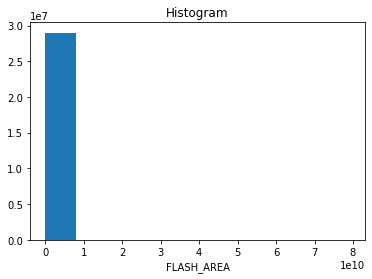

In [27]:
L.FLASH_AREA.plot.hist()

(array([2.8998962e+07, 9.5900000e+02, 6.5000000e+01, 1.1000000e+01,
        4.0000000e+00]),
 array([6.5160996e+07, 1.5883846e+10, 3.1702530e+10, 4.7521214e+10,
        6.3339897e+10, 7.9158583e+10], dtype=float32),
 <BarContainer object of 5 artists>)

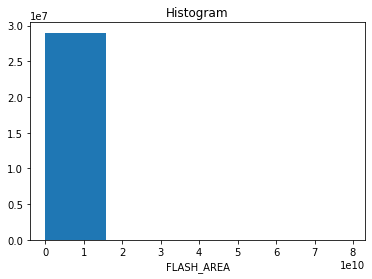

In [28]:
# Trying to make more informative histogram diagram
L.FLASH_AREA.plot.hist(bins=5)


(array([2.8999999e+07, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([0.0000000e+00, 1.2079896e-09, 2.4159792e-09, 3.6239689e-09,
        4.8319584e-09, 6.0399481e-09, 7.2479378e-09, 8.4559275e-09,
        9.6639168e-09, 1.0871907e-08, 1.2079896e-08], dtype=float32),
 <BarContainer object of 10 artists>)

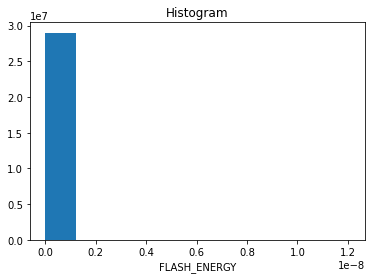

In [29]:
L.FLASH_ENERGY.plot.hist()

(array([2.8987808e+07, 9.8990000e+03, 1.6170000e+03, 4.3200000e+02,
        1.5200000e+02, 4.4000000e+01, 2.9000000e+01, 1.2000000e+01,
        4.0000000e+00, 4.0000000e+00]),
 array([2.0000e+00, 5.0380e+02, 1.0056e+03, 1.5074e+03, 2.0092e+03,
        2.5110e+03, 3.0128e+03, 3.5146e+03, 4.0164e+03, 4.5182e+03,
        5.0200e+03]),
 <BarContainer object of 10 artists>)

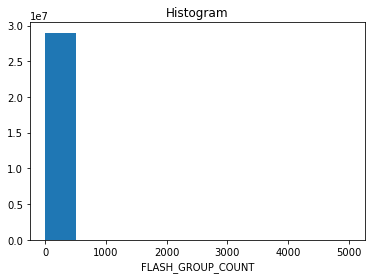

In [30]:
L.FLASH_GROUP_COUNT.plot.hist()

(array([2.8987056e+07, 1.1875000e+04, 8.2200000e+02, 1.6600000e+02,
        4.7000000e+01, 1.6000000e+01, 1.0000000e+01, 2.0000000e+00,
        3.0000000e+00, 4.0000000e+00]),
 array([1.0000e+00, 1.5730e+02, 3.1360e+02, 4.6990e+02, 6.2620e+02,
        7.8250e+02, 9.3880e+02, 1.0951e+03, 1.2514e+03, 1.4077e+03,
        1.5640e+03]),
 <BarContainer object of 10 artists>)

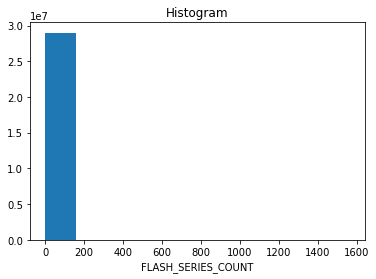

In [31]:
L.FLASH_SERIES_COUNT.plot.hist()

(array([2.8999762e+07, 2.2100000e+02, 1.4000000e+01, 3.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([2.000000e+00, 1.112750e+04, 2.225300e+04, 3.337850e+04,
        4.450400e+04, 5.562950e+04, 6.675500e+04, 7.788050e+04,
        8.900600e+04, 1.001315e+05, 1.112570e+05]),
 <BarContainer object of 10 artists>)

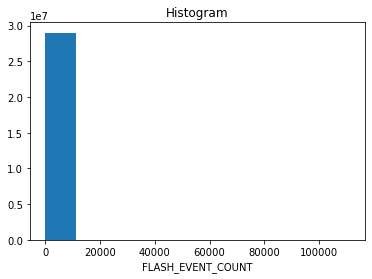

In [32]:
L.FLASH_EVENT_COUNT.plot.hist()

(array([2.8969519e+07, 2.8478000e+04, 1.6280000e+03, 2.5700000e+02,
        7.6000000e+01, 2.5000000e+01, 8.0000000e+00, 5.0000000e+00,
        3.0000000e+00, 2.0000000e+00]),
 array([ 0.       ,  2.7878006,  5.575601 ,  8.363401 , 11.151202 ,
        13.939003 , 16.726803 , 19.514605 , 22.302404 , 25.090206 ,
        27.878006 ], dtype=float32),
 <BarContainer object of 10 artists>)

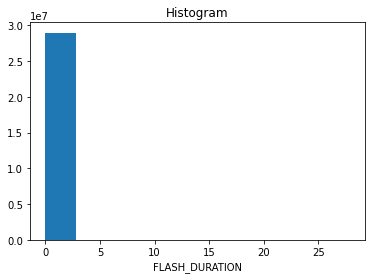

In [33]:
L.FLASH_DURATION.plot.hist()

(array([2.8988239e+07, 1.1358000e+04, 3.6600000e+02, 3.1000000e+01,
        5.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([   0.     ,  113.18221,  226.36443,  339.54663,  452.72885,
         565.9111 ,  679.09326,  792.2755 ,  905.4577 , 1018.63995,
        1131.8221 ], dtype=float32),
 <BarContainer object of 10 artists>)

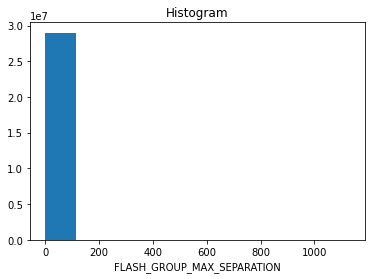

In [34]:
L.FLASH_GROUP_MAX_SEPARATION.plot.hist()

(array([2.8991892e+07, 6.5410000e+03, 1.0900000e+03, 3.0600000e+02,
        1.0300000e+02, 3.6000000e+01, 1.6000000e+01, 8.0000000e+00,
        4.0000000e+00, 5.0000000e+00]),
 array([   0.    ,  708.0814, 1416.1628, 2124.2441, 2832.3257, 3540.407 ,
        4248.4883, 4956.57  , 5664.6514, 6372.7324, 7080.814 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

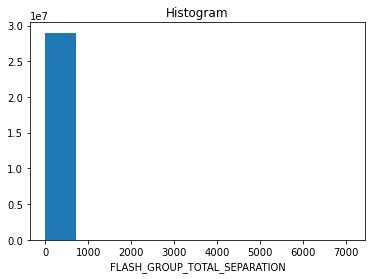

In [35]:
L.FLASH_GROUP_TOTAL_SEPARATION.plot.hist()

(array([2.8975847e+07, 2.3571000e+04, 5.3300000e+02, 4.3000000e+01,
        5.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([   0.     ,  115.22754,  230.45508,  345.68262,  460.91016,
         576.1377 ,  691.36523,  806.5928 ,  921.8203 , 1037.0479 ,
        1152.2754 ], dtype=float32),
 <BarContainer object of 10 artists>)

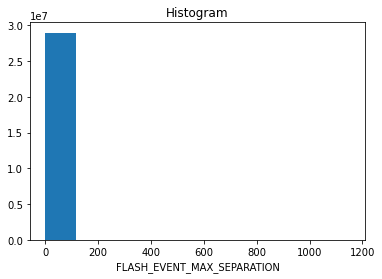

In [36]:
L.FLASH_EVENT_MAX_SEPARATION.plot.hist()

(array([2.899179e+07, 7.299000e+03, 7.190000e+02, 1.460000e+02,
        3.600000e+01, 6.000000e+00, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <BarContainer object of 10 artists>)

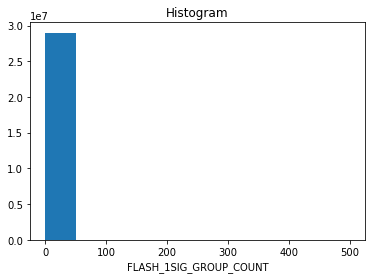

In [37]:
L.FLASH_1SIG_GROUP_COUNT.plot.hist()

(array([2.8991069e+07, 7.7490000e+03, 9.4500000e+02, 1.6400000e+02,
        5.0000000e+01, 1.6000000e+01, 5.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
        202.5, 225. ]),
 <BarContainer object of 10 artists>)

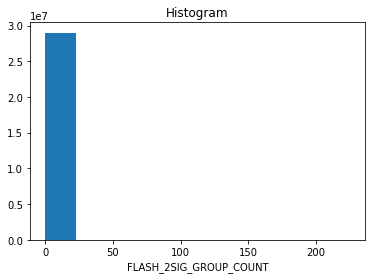

In [38]:
L.FLASH_2SIG_GROUP_COUNT.plot.hist()

(array([2.8983828e+07, 1.3395000e+04, 1.9990000e+03, 4.8300000e+02,
        1.7200000e+02, 6.9000000e+01, 2.9000000e+01, 1.8000000e+01,
        5.0000000e+00, 3.0000000e+00]),
 array([ 0. ,  9.4, 18.8, 28.2, 37.6, 47. , 56.4, 65.8, 75.2, 84.6, 94. ]),
 <BarContainer object of 10 artists>)

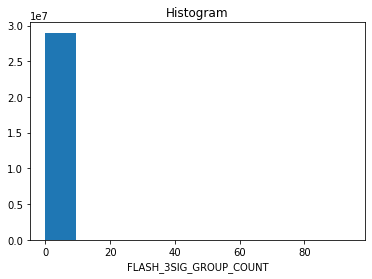

In [39]:
L.FLASH_3SIG_GROUP_COUNT.plot.hist()

(array([2.8989406e+07, 9.8200000e+03, 5.6100000e+02, 1.3700000e+02,
        4.7000000e+01, 1.2000000e+01, 1.1000000e+01, 4.0000000e+00,
        2.0000000e+00, 1.0000000e+00]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

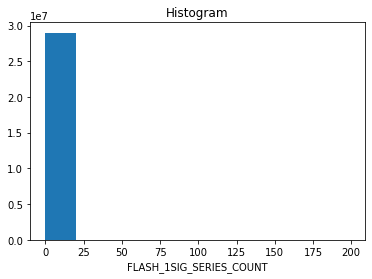

In [40]:
L.FLASH_1SIG_SERIES_COUNT.plot.hist()

(array([2.8973991e+07, 2.4805000e+04, 9.5900000e+02, 1.5500000e+02,
        5.2000000e+01, 1.7000000e+01, 1.1000000e+01, 5.0000000e+00,
        3.0000000e+00, 3.0000000e+00]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <BarContainer object of 10 artists>)

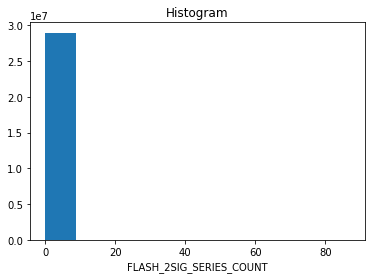

In [41]:
L.FLASH_2SIG_SERIES_COUNT.plot.hist()

(array([2.8954943e+07, 4.3182000e+04, 1.5660000e+03, 2.1300000e+02,
        6.5000000e+01, 1.6000000e+01, 9.0000000e+00, 3.0000000e+00,
        2.0000000e+00, 2.0000000e+00]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <BarContainer object of 10 artists>)

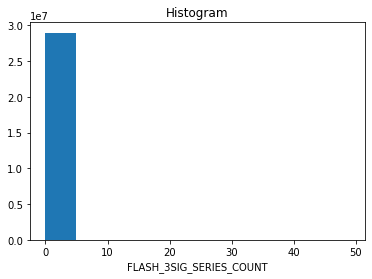

In [42]:
L.FLASH_3SIG_SERIES_COUNT.plot.hist()

(array([2.8415648e+07, 4.4557500e+05, 1.0096900e+05, 3.1285000e+04,
        5.0280000e+03, 1.0330000e+03, 3.2600000e+02, 1.0200000e+02,
        2.6000000e+01, 9.0000000e+00]),
 array([0.0000000e+00, 1.5335999e-13, 3.0671998e-13, 4.6007995e-13,
        6.1343996e-13, 7.6679993e-13, 9.2015989e-13, 1.0735199e-12,
        1.2268799e-12, 1.3802399e-12, 1.5335999e-12], dtype=float32),
 <BarContainer object of 10 artists>)

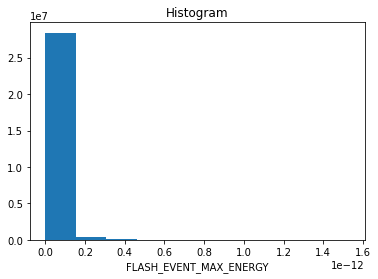

In [43]:
L.FLASH_EVENT_MAX_ENERGY.plot.hist()

(array([2.8999994e+07, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 2.0000000e+00]),
 array([0.00000000e+00, 5.21881732e-14, 1.04376346e-13, 1.56564526e-13,
        2.08752693e-13, 2.60940873e-13, 3.13129053e-13, 3.65317233e-13,
        4.17505386e-13, 4.69693566e-13, 5.21881746e-13], dtype=float32),
 <BarContainer object of 10 artists>)

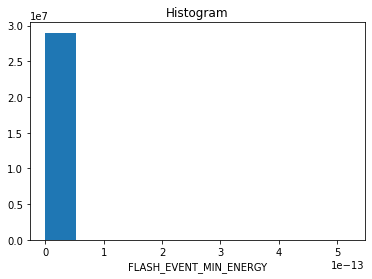

In [44]:
L.FLASH_EVENT_MIN_ENERGY.plot.hist()

(array([2.899562e+07, 4.080000e+03, 2.470000e+02, 4.300000e+01,
        7.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([1.52596998e-15, 3.17813787e-12, 6.35474963e-12, 9.53136181e-12,
        1.27079736e-11, 1.58845853e-11, 1.90611971e-11, 2.22378088e-11,
        2.54144206e-11, 2.85910323e-11, 3.17676441e-11], dtype=float32),
 <BarContainer object of 10 artists>)

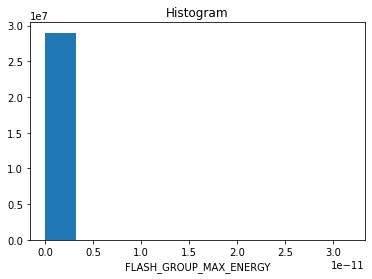

In [45]:
L.FLASH_GROUP_MAX_ENERGY.plot.hist()

(array([2.8999261e+07, 4.2300000e+02, 1.7400000e+02, 7.0000000e+01,
        3.7000000e+01, 1.6000000e+01, 1.1000000e+01, 4.0000000e+00,
        4.0000000e+00, 1.0000000e+00]),
 array([2.5432834e-16, 6.9904683e-13, 1.3978394e-12, 2.0966319e-12,
        2.7954245e-12, 3.4942169e-12, 4.1930097e-12, 4.8918018e-12,
        5.5905944e-12, 6.2893870e-12, 6.9881796e-12], dtype=float32),
 <BarContainer object of 10 artists>)

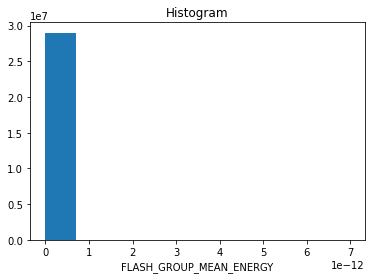

In [46]:
L.FLASH_GROUP_MEAN_ENERGY.plot.hist()

(array([2.8999974e+07, 1.2000000e+01, 8.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([0.0000000e+00, 4.9960258e-13, 9.9920517e-13, 1.4988077e-12,
        1.9984103e-12, 2.4980129e-12, 2.9976154e-12, 3.4972179e-12,
        3.9968207e-12, 4.4964232e-12, 4.9960257e-12], dtype=float32),
 <BarContainer object of 10 artists>)

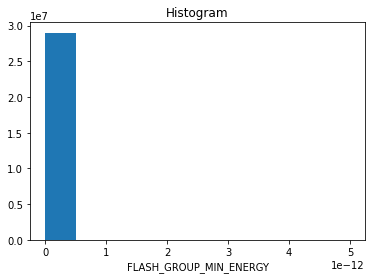

In [47]:
L.FLASH_GROUP_MIN_ENERGY.plot.hist()

Summary: Some histograms like latitude and longitude have interesting peaks.  There might be regions where there are more naturally ocurring lightening.  For the time attribute there also might be re-occuring times of day like at night where there is more ligtening. 